In [1]:
import torch
from train import Trainer
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

In [2]:
def test(model, input_text, num_chars=1000, block_size=128, T = 1):
    """
    Generate a sequence of text by predicting characters iteratively.
    
    args:
    ---
        model: The trained model.
        input_text (str): Initial input text.
        num_chars (int): Number of characters to generate.
        block_size (int): Maximum context size for the model (e.g., 128).
    
    returns:
    --------
        str: The full generated text.
    """

    model.model.eval()
    input_sentence = input_text
    final_sentence = input_text

    with torch.no_grad():
        for _ in range(num_chars):

            input_indices = [model.dataset.stoi[char] for char in input_sentence]
            x_test = torch.tensor(input_indices).unsqueeze(0)  
            
            output = model.model(x_test)
            
            # predicted_index = torch.argmax(output[-1,:]).item()  
            proba = torch.softmax(output[0, -1, :], dim=-1) / T
            predicted_index = torch.multinomial(proba, 1).item()
            
            predicted_letter = [k for k, v_ in model.dataset.stoi.items() if v_ == predicted_index][0]
            
            final_sentence += predicted_letter
            input_sentence += predicted_letter
            
            if len(input_sentence) > block_size:
                input_sentence = input_sentence[-block_size:]

    return final_sentence


---

## Shakespeare dataset

Training Progress:  48%|████▊     | 2891/6000 [4:09:42<4:28:31,  5.18s/batch]


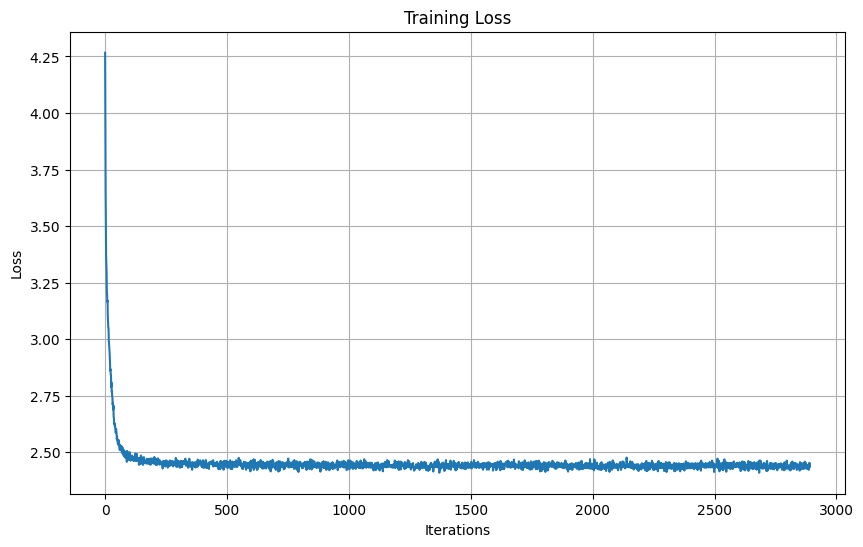

In [ ]:
train = Trainer(datafile="../datasets/shakespeare-data-subset.txt", 
                block_size=128, 
                batch_size=128,
                dim_emb=768, 
                hidden_layer=128, 
                num_head=8, 
                num_transformer=12, 
                learning_rate=0.0001, 
                iteration=6000)

train.run()
train.save_model(path="../trained_models/shakespeare-model.pth")

plt.figure(figsize=(10, 6))
plt.plot(train.running_loss)
plt.title("Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [4]:
train = Trainer(datafile="../datasets/shakespeare-data-subset.txt", 
                block_size=128, 
                batch_size=128,
                dim_emb=768, 
                hidden_layer=128, 
                num_head=8, 
                num_transformer=12, 
                learning_rate=0.0001, 
                iteration=6000)

train.load_model("../trained_models/shakespeare-model.pth")

initial_phrase = "First Citizen: "
generated_text = test(train, initial_phrase, num_chars=1000, block_size=128)

print(generated_text)

/Users/stacy/Desktop/deep_learning/language_model_project/src/train.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


First Citizen: td hentoworir, weeprenghine st notr Citisu m, k, bent thil MElfusrs:
Madool Y: E rves pseathande, whadind ince ouffond towemirinen; ben ferte, ses Gile;
TERBufuls youcesthe anche pith f toncelo

Ler, BY:
LII ca, ce CINEDheshong IDou hes ted!
Wheranghemilars mentlliu th s iear

IICI anoureavetelasby prse so coural dy.
Whorgordod; uuthand y: higicaverofitas arens
Tisneixt weatrn d le thil l ppe, Set ceakecay pouthe pe, win:

MA:
I yser t tiod wof by.
VAREENUnde, a w's outhow foul firire, wand bon ARI myo pan aut Goutryoun:
Wily oig we id,
Doury ld hestroryou falll t ans hondowimaionod I an me ape.
Nand, n oug wouckirasbeengrs un igheag henditt, he ckenove, and heamesshis se inrbo gesceach n an go ane,

KIUSER
Thanth ws michiexpad oul
LIns;
EE:
Be,
ANENEt de so souller as nd ind thansh t nd, I ath, tothors fromel mand prestowe hicu aurd myod mby orill it, f hess asth--RGouret IRDWhes ant. Tie iuk ar l'saighen sher Siloustizel. mou ppe fouren bodik?
Bed y, mis EENI t BEETh, 

In [5]:
for T in [10, 100, 500, 1000] : 
    input_text = "First Citizen: "
    generated_text = test(train, input_text, num_chars=200, block_size=128, T = T)
    print(f"\nT = {T}\n ----------------------- \n")
    print(generated_text)


T = 10
 ----------------------- 

First Citizen: ans?
Alerar'Thingif.
Whely our s I In, aleee po bourederr wanisi: bold te p s togenct fofut aprva
INI an'sever
Med tes oureiulot estrs?
HAng st blouttothe ghe he t'sel chineserswor t ooce,
MERI.
het y

T = 100
 ----------------------- 

First Citizen: wind
Fisseledur buned g thealslete bour,
HATrat, ms rrin thailinde
Ritspr'din are ud imim ber s e wof l thagaladerckgofout
YUCEELAGARDUN:
Andingd, ts thavig, RUSareet sss f hes by rssten Sorers rof mu

T = 500
 ----------------------- 

First Citizen: fen yorur s,
Andollal

BOLAstyon oue abeparpe, nngryocke,
Wan aink ho tllilingomecure t d
ICHe l
SS:
CORUCKiesuo ouroulourimy f ouctet mamepavineshen weveasut, blldouring ngerthyout thalyst the terre 

T = 1000
 ----------------------- 

First Citizen: t theershes atof innd l; nche wik,---hano ow yofee d areds me,
Bure tes houtares, hy bleautellimeajesss irat d, nthan tolioud be osthe.
Wenape m.
ORAnof am n toseit,


THeng.
Nhbutst thad,
AROW

---

## Jul Dataset

Training Progress: 202batch [19:11,  5.70s/batch]                      


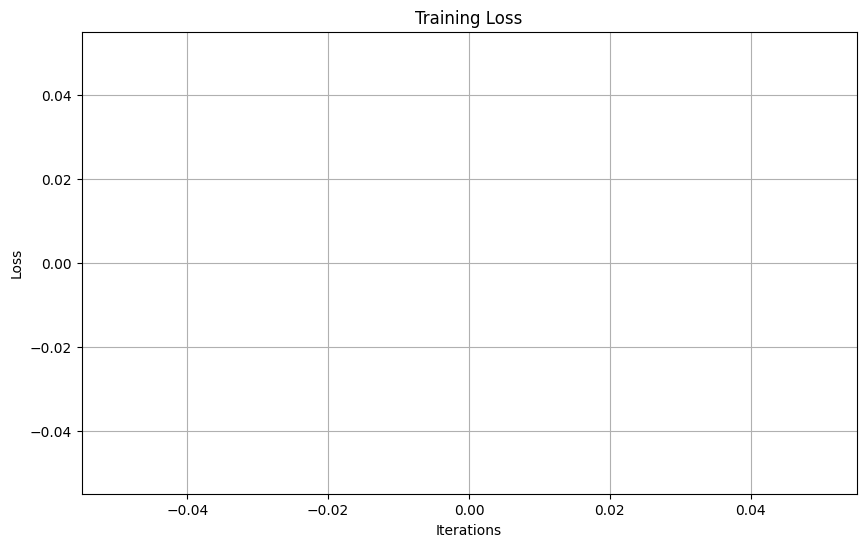

In [6]:
train_jul = Trainer(datafile="../datasets/jul-data.txt", 
                block_size=128, 
                batch_size=128,
                dim_emb=768, 
                hidden_layer=128, 
                num_head=8, 
                num_transformer=12, 
                learning_rate=0.0001, 
                iteration = 200)

train_jul.run()
train_jul.save_model(path="../trained_models/jul-model.pth")

plt.figure(figsize=(10, 6))
plt.plot(train.running_loss)
plt.title("Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [7]:
# train_jul = Trainer(datafile="jul-data.txt", 
#                 block_size=128, 
#                 batch_size=128,
#                 dim_emb=768, 
#                 hidden_layer=128, 
#                 num_head=8, 
#                 num_transformer=12, 
#                 learning_rate=0.0001, 
#                 iteration=6000)

# train_jul.load_model("jul-model.pth")

initial_phrase = "Wesh Alors "
generated_text = test(train_jul, initial_phrase, num_chars=1000, block_size=128)

print(generated_text)

Wesh Alors cetst tч j'h pas ait evéouboue vaivi gis jalsl'u abou'v c''eais
I
TQos monnepa r ff , paîoca
Jdambres d'enulmenu, le fre m, 
JSucrmandlom’i ь´roury'llls t
E4rncÇllantu's
Ça fa de tréluis me
Emة, tmis queurci coroe, ieutesYe dmoimen
Anoue u, vêáreunpp’arondresem'e ruau
Emale t vf،eis
Pourrinen t lâigas Bm
J't gai
Ma c 
Cdaurnt latore gh j'fas fplaitetKs’s ci neu quxnd,rtonnarest p]au,on Be
(t le
Fts manoll'
J's mond, con, mè
2êrllis à cdas f
Iou aman dikvoiPu
EpaÀ)Т)
CTySrursteurinaronut  ll'j’, de
Àaroue
J'e r iss ts, và os d'e, che, dopllie ces st pr ca cees mJ'ales gin pll c's j’asépl
Faier m’s mourèanenam, Š*qullloupand'rl’Ki
S4s duresoula lenses mai
Toueau'oun qus
اmilatui venèl, le vis j’tostanenduOres laisunodé is glet dendétéacilete es lèir cole
Egqut ckêais?bPmau Pn mah, qur, le, c'wmtonsi c'amis, paiu, éovoin mm quou outenogonéé'lpa0e Gec've itJRqut y, pourqure lirob
J-moce léنmge llaus d'anains БПe ls dunduoponŠl'ie, m
J's meés moas le r'e faleu odan b3lais tor s y